##### Handling Missing Categorical Data 
Missing Category Imputation – Treat “missing” as its own category (like “Unknown”).
Useful when absence of value can be informative for the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Datasets/train (2).csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [3]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

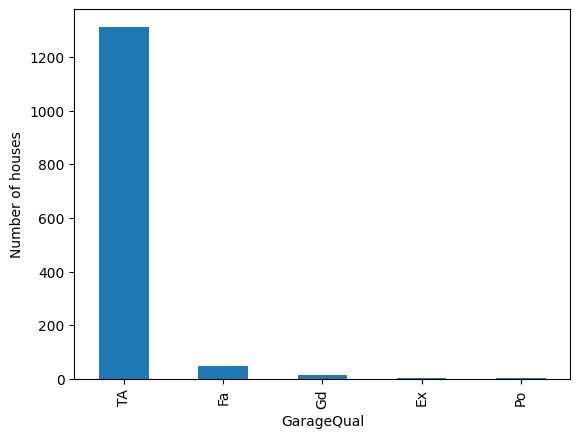

In [4]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [5]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('Gd')

Text(0, 0.5, 'Number of houses')

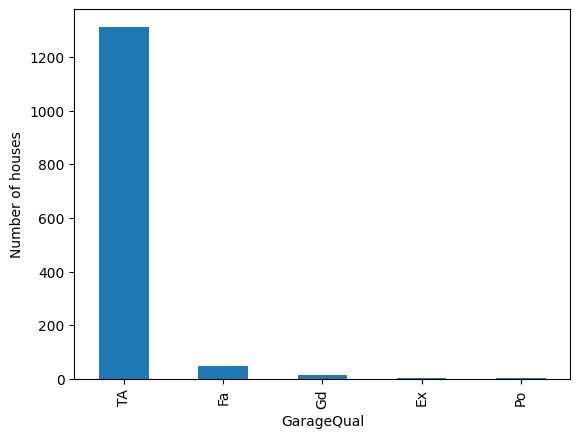

In [6]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')
imputer.set_output(transform="pandas")

SimpleImputer(fill_value='Missing', strategy='constant')

In [10]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

In [11]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)